## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석'

## 과제
* 데이터 구조, 분포 확인, 전처리 : 1.버스정류장데이터 / 2.유동인구데이터 / 3.주민등록데이터 / 4.업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 5.데이터 분석

---

## 데이터 정보

|구분||
|-|-|
|파일명|**(1) BUS_STATION_BOARDING_MONTH_202204.csv**|
|출처|https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do|
|설명|서울시 버스노선별 정류장별 승하차 인원 정보 (2022년 4월)|

<br>

|구분||
|-|-|
|파일명|**(2) 서울시버스정류소위치정보(20230613).xlsx**|
|출처|https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do|
|설명|서울시 버스정류장 위치정보(2023년 6월)|

---

## 1.데이터 불러오기

###  데이터 프레임을 불러오고 변수로 저장
* csv : pd.read_csv("파일이름.csv")
* txt : pd.read_csv("파일이름.csv", sep="구분자")
* xlsx : pd.read_excel("파일이름.xlsx")
* pickle : pd.read_pickle("파일이름.pkl")
<br>
[참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame, List, Dict 등 모든 객체 저장 가능
<br>
(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

In [50]:
# 분석
import pandas as pd
import numpy as np
# import openpyxl # pd.read_excel


In [4]:
bus_station = pd.read_csv('./data/(1) BUS_STATION_BOARDING_MONTH_202204.csv', encoding='cp949')
bus_station.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [8]:
# 데이터 프레임의 Shape
print("데이터 갯수: %d\n컬럼 수: %d" % (bus_station.shape[0], bus_station.shape[1]))

데이터 갯수: 1169878
컬럼 수: 8


---

## 2.기본 정보 확인 및 클렌징

* 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

In [10]:
# 기초 통계량
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.169878e+06,1.169878e+06,1.169878e+06,1.169878e+06
mean,2.022042e+07,1.108042e+02,1.082804e+02,2.022043e+07
std,8.661492e+00,1.554787e+02,1.420829e+02,2.667754e+01
min,2.022040e+07,0.000000e+00,0.000000e+00,2.022040e+07
25%,2.022041e+07,1.800000e+01,2.100000e+01,2.022041e+07
50%,2.022042e+07,6.300000e+01,6.800000e+01,2.022042e+07
75%,2.022042e+07,1.460000e+02,1.450000e+02,2.022043e+07
max,2.022043e+07,3.990000e+03,3.615000e+03,2.022050e+07


In [11]:
# 데이터 타입, 결측값 갯수
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


### 2-1.버스정류장 위치를 구 별로 구분

* 버스정류장ARS번호의 앞 두자리가 구를 의미 (25까지 서울시)


In [12]:
# 버스정류장ARS번호의 정보
bus_station['버스정류장ARS번호']

0          06243
1          06242
2          06238
3          06309
4          11428
           ...  
1169873    12004
1169874    06278
1169875    16555
1169876    25236
1169877    06280
Name: 버스정류장ARS번호, Length: 1169878, dtype: object

In [13]:
bus_station['지역구'] = bus_station['버스정류장ARS번호'].str.slice(0, 2).map({
    '01':'종로구',  '02':'중구',    '03':'용산구',    '04':'성동구',  '05':'광진구',
    '06':'동대문구',    '07':'중랑구',  '08':'성북구',  '09':'강북구',  '10':'도봉구',
    '11':'노원구',  '12':'은평구',  '13':'서대문구',  '14':'마포구',    '15':'양천구',
    '16':'강서구',  '17':'구로구',  '18':'금천구',  '19':'영등포구',    '20':'동작구',
    '21':'관악구',  '22':'서초구',  '23':'강남구',  '24':'송파구',  '25':'강동구'
})

In [14]:
display(bus_station.head(3))
display(bus_station.tail(3))

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,지역구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구


,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,지역구
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503,강서구
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503,강동구
1169877,20220430,201,201번(구리~서울역),06280,영휘원사거리.(구)홍릉사거리,122,49,20220503,동대문구


### 2-2.결측치 처리

In [15]:
# (가상기점), (가상종점)때문에 ARS번호가 '~'로 나오는 곳이 있음.
bus_station.loc[bus_station['버스정류장ARS번호'] =='~']

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,지역구
747,20220401,750B,750B번(은평차고지~서울대),~,은평공영차고지(가상),0,100,20220404,NaN
852,20220401,602,602번(양천공용차고지~시청앞),~,양천공영차고지(기점가상),10,0,20220404,NaN
1048,20220401,2227,2227번(중랑공영차고지~중곡역),~,중랑공영차고지(기점가상),1,0,20220404,NaN
1252,20220401,2311,2311번(중랑차고지~문정동),~,중랑공영차고지(기점가상),7,0,20220404,NaN
1479,20220401,2312,2312번(중랑공영차고지~강동공영차고지),~,중랑공영차고지(기점가상),4,0,20220404,NaN
...,...,...,...,...,...,...,...,...,...
1168831,20220430,1119,1119번(강북청소년수련관난나~녹천역),~,선일교통종점(가상),0,1,20220503,NaN
1169138,20220430,5523,5523번(보성운수기종점~서울대입구역),~,보성운수기종점(가상),2,129,20220503,NaN
1169509,20220430,153,153번(우이동~당곡사거리),~,우이동도선사입구(기점가상),10,2,20220503,NaN
1169612,20220430,2015,2015번(신내공영차고지~동대문운동장),~,중랑공영차고지(기점가상),16,0,20220503,NaN


In [18]:
bus_station.loc[bus_station['지역구'].isna()] # 가상, 가상기점, 가상종점, 서울외

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,지역구
14,20220401,504,504번(광명공영차고지~남대문),38092,철산주공9단지,4,10,20220404,NaN
15,20220401,504,504번(광명공영차고지~남대문),38095,철산우체국,46,46,20220404,NaN
17,20220401,504,504번(광명공영차고지~남대문),38102,철산주공8단지,27,51,20220404,NaN
18,20220401,504,504번(광명공영차고지~남대문),38085,모세로삼거리.광명시보훈회관,12,108,20220404,NaN
21,20220401,504,504번(광명공영차고지~남대문),38013,광명시청.한국폴리텍대학,107,167,20220404,NaN
...,...,...,...,...,...,...,...,...,...
1169830,20220430,5623,5623번(군포 공영차고지~여의도),40034,삼성마을5단지,0,14,20220503,NaN
1169854,20220430,542,542번(군포버스공영차고지~신사역),56033,중촌마을,48,22,20220503,NaN
1169855,20220430,5623,5623번(군포 공영차고지~여의도),40615,군포공영차고지,0,7,20220503,NaN
1169866,20220430,7739,7739번(은평공영차고지~홍대입구역),35331,은평공영차고지,15,0,20220503,NaN


In [19]:
# NaN 값 제거
bus_station.dropna(axis=0, inplace=True)

In [20]:
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064594 entries, 0 to 1169877
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1064594 non-null  int64 
 1   노선번호        1064594 non-null  object
 2   노선명         1064594 non-null  object
 3   버스정류장ARS번호  1064594 non-null  object
 4   역명          1064594 non-null  object
 5   승차총승객수      1064594 non-null  int64 
 6   하차총승객수      1064594 non-null  int64 
 7   등록일자        1064594 non-null  int64 
 8   지역구         1064594 non-null  object
dtypes: int64(4), object(5)
memory usage: 81.2+ MB


In [21]:
# 버스정류장ARS번호의 type 변경
bus_station = bus_station.astype({'버스정류장ARS번호':'int'})

### Q) 구별 버스 정류장 개수?

In [24]:
# = 고유값의 갯수
bus_station.groupby('지역구')['버스정류장ARS번호'].nunique().to_frame().reset_index()

,지역구,버스정류장ARS번호
0,강남구,506
1,강동구,373
2,강북구,413
3,강서구,566
4,관악구,468
5,광진구,272
6,구로구,486
7,금천구,345
8,노원구,515
9,도봉구,361


In [29]:
# 강남구와 서초구에는 500개이상의 버스정류장이 있음
bus_station.loc[bus_station['지역구'].str.contains('강남구|서초구')]['버스정류장ARS번호'].nunique()

1106

### *데이터 불러오기2

In [30]:
seoul_bus_st = pd.read_excel('./data/(2) 서울시버스정류소위치정보(20230613).xlsx')
seoul_bus_st.head(2)

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
0,100000001,1001,종로2가사거리,126.987750,37.569765
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183


In [31]:
# 서울의 버스정류장 데이터의 정보
seoul_bus_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12570 entries, 0 to 12569
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NODE_ID  12570 non-null  int64  
 1   ARS_ID   12570 non-null  int64  
 2   정류소명     12570 non-null  object 
 3   X좌표      12570 non-null  float64
 4   Y좌표      12570 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 491.1+ KB


In [33]:
# 데이터의 컬럼명 변경
seoul_bus_st.rename(columns={'ARS_ID':'버스정류장ARS번호'}, inplace=True)
seoul_bus_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12570 entries, 0 to 12569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NODE_ID     12570 non-null  int64  
 1   버스정류장ARS번호  12570 non-null  int64  
 2   정류소명        12570 non-null  object 
 3   X좌표         12570 non-null  float64
 4   Y좌표         12570 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 491.1+ KB


In [35]:
# 서울시 버스정류장 데이터와 bus_station 합치기
seoulbus = pd.merge(bus_station, seoul_bus_st, how='inner', on='버스정류장ARS번호')
seoulbus.head()

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,지역구,NODE_ID,정류소명,X좌표,Y좌표
0,20220401,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구,105000157,장안동삼성쉐르빌아파트,127.071284,37.571248
1,20220401,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,75,197,20220404,동대문구,105000157,장안동삼성쉐르빌아파트,127.071284,37.571248
2,20220401,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,21,245,20220404,동대문구,105000157,장안동삼성쉐르빌아파트,127.071284,37.571248
3,20220401,2416,2416번(중랑공영차고지~삼성역),6243,장안동삼성쉐르빌아파트,42,268,20220404,동대문구,105000157,장안동삼성쉐르빌아파트,127.071284,37.571248
4,20220402,2233,2233번(면목동~옥수동),6243,장안동삼성쉐르빌아파트,12,127,20220405,동대문구,105000157,장안동삼성쉐르빌아파트,127.071284,37.571248


In [40]:
# 구 별로 버스 정류장의 개수 (count()는 중복포함 모든 값의 수)
seoulbus.groupby('지역구', as_index=False)[['버스정류장ARS번호']].nunique().rename(columns={'버스정류장ARS번호':'버스정류장수'})

,지역구,버스정류장수
0,강남구,499
1,강동구,373
2,강북구,413
3,강서구,566
4,관악구,466
5,광진구,270
6,구로구,486
7,금천구,345
8,노원구,515
9,도봉구,359


In [38]:
# 전체 버스정류장ARS번호 갯수
seoulbus['버스정류장ARS번호'].nunique()

10624

### Q) 구 별로 버스 노선이 몇 개나 지나가는가?

In [41]:
seoulbus.groupby('지역구', as_index=False)[['노선번호']].nunique().rename(columns={'노선번호':'노선수'})

,지역구,노선수
0,강남구,91
1,강동구,21
2,강북구,67
3,강서구,49
4,관악구,86
5,광진구,41
6,구로구,79
7,금천구,58
8,노원구,57
9,도봉구,46


### Q) 각 구별 승차 총 승객수, 하차 총 승객수?

In [44]:
seoulbus.groupby('지역구', as_index=False)[['승차총승객수', '하차총승객수']].sum().rename(columns={'승차총승객수':'총승차승객수', '하차총승객수':'총하차승객수'})

,지역구,총승차승객수,총하차승객수
0,강남구,8030483,7569213
1,강동구,2894675,2840350
2,강북구,4825181,4671783
3,강서구,4681083,4652828
4,관악구,7655819,7792476
5,광진구,2754535,2759180
6,구로구,4942197,4730992
7,금천구,3776658,3581930
8,노원구,4368306,4296675
9,도봉구,3304305,3211421


### Q) 각 구별 승차 평균 승객수, 하차 평균 승객수?

In [45]:
seoulbus.groupby('지역구', as_index=False)[['승차총승객수', '하차총승객수']].mean().rename(columns={'승차총승객수':'평균승차승객수', '하차총승객수':'평균하차승객수'})

,지역구,평균승차승객수,평균하차승객수
0,강남구,128.767927,121.371512
1,강동구,98.817977,96.963438
2,강북구,133.020373,128.791504
3,강서구,88.119480,87.587591
4,관악구,154.753674,157.516040
5,광진구,117.810829,118.009495
6,구로구,119.235615,114.140076
7,금천구,123.098370,116.751304
8,노원구,88.673162,87.219110
9,도봉구,106.859356,103.855540


### 2-3.데이터 합치기

In [52]:
local_st = seoulbus.groupby('지역구', as_index=False)[['버스정류장ARS번호']].nunique()
local_route = seoulbus.groupby('지역구', as_index=False)[['노선번호']].nunique()
local_sum = seoulbus.groupby('지역구', as_index=False)[['승차총승객수', '하차총승객수']].sum()
local_mean = seoulbus.groupby('지역구', as_index=False)[['승차총승객수', '하차총승객수']].mean().round(2)

temp1 = pd.merge(local_st, local_route, how='inner', on='지역구')
temp2 = pd.merge(local_sum, local_mean, how='inner', on='지역구')
local_bus = pd.merge(temp1, temp2, how='inner', on='지역구')

In [53]:
local_bus.rename(columns={'버스정류장ARS번호':'정류장수',
                          '노선번호':'노선수',
                          '승차총승객수_x':'총승차승객수',
                          '하차총승객수_x':'총하차승객수',
                          '승차총승객수_y':'평균승차승객수',
                          '하차총승객수_y':'평균하차승객수'}, inplace=True)

local_bus.head(2)

,지역구,정류장수,노선수,총승차승객수,총하차승객수,평균승차승객수,평균하차승객수
0,강남구,499,91,8030483,7569213,128.77,121.37
1,강동구,373,21,2894675,2840350,98.82,96.96


In [54]:
# 파일 저장
local_bus.to_csv('df1_local_bus.csv', index=False)

---

## 3.데이터 분석하기
* 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.

  - 데이터들의 패턴 탐색
  - 변수들간의 관계 파악

In [55]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False}, style='darkgrid') # 음수 부호 깨짐 현상 방지, 그래프 배경색

# scipy
import scipy.stats as spst  

In [60]:
sns.set_palette('coolwarm', bus_station['지역구'].nunique())

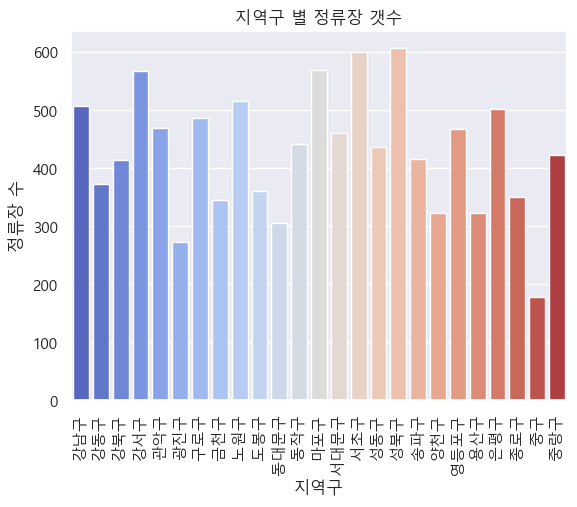

In [63]:
graph1 = bus_station.groupby('지역구', as_index=False)['버스정류장ARS번호'].nunique().sort_values(by='지역구')

sns.barplot(x='지역구', y='버스정류장ARS번호',
            data=graph1,
            hue='지역구', legend=False, palette=sns.color_palette())
plt.xticks(rotation=90)
plt.ylabel('정류장 수')
plt.title('지역구 별 정류장 갯수')
plt.show()

In [66]:
# 정류장 수가 가장 많은 상위 5개 지역구
graph1.sort_values(by='버스정류장ARS번호', ascending=False).rename(columns={'버스정류장ARS번호':'정류장수'}).head(5)

,지역구,정류장수
16,성북구,606
14,서초구,600
12,마포구,568
3,강서구,566
8,노원구,515


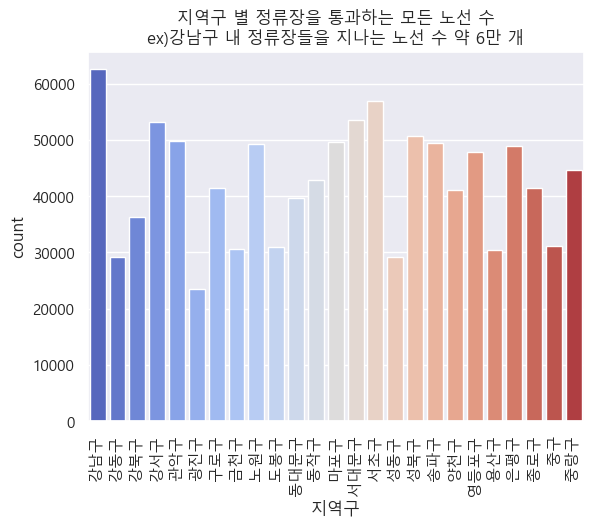

In [67]:
graph2 = bus_station.groupby('지역구', as_index=False)['버스정류장ARS번호'].size().sort_values(by='지역구')

sns.barplot(x='지역구', y='size',
            data=graph2,
            hue='지역구', legend=False, palette=sns.color_palette())
plt.xticks(rotation=90)
plt.ylabel('count')
plt.title('지역구 별 정류장을 통과하는 모든 노선 수\nex)강남구 내 정류장들을 지나는 노선 수 약 6만 개')
plt.show()

In [70]:
# 지역구 내 노선이 가장 많은 상위 5개 지역구
graph2.sort_values(by='size', ascending=False).rename(columns={'size':'노선수'}).head(5)

,지역구,노선수
0,강남구,62571
14,서초구,57001
13,서대문구,53526
3,강서구,53122
16,성북구,50749


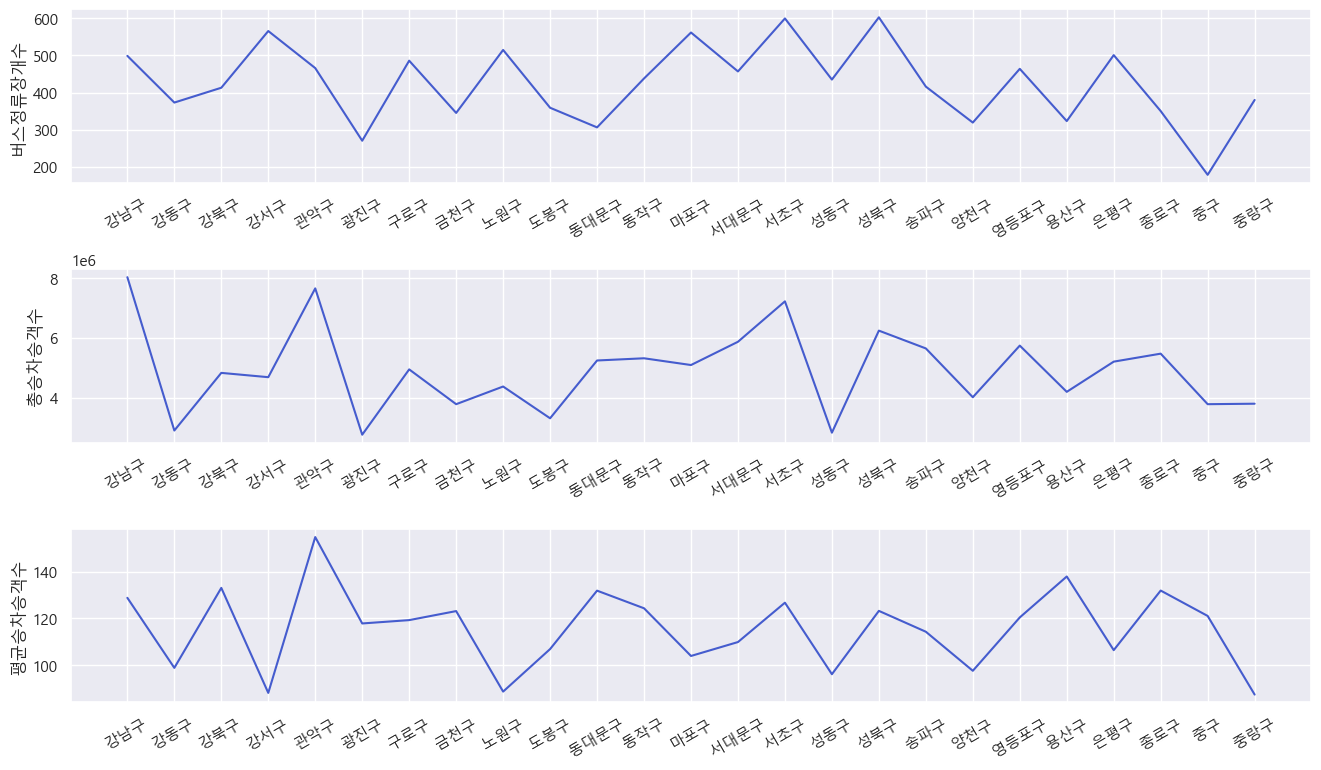

In [72]:
plt.figure(figsize=(16,9))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,1)
plt.plot('지역구', '정류장수', data=local_bus)
plt.xticks(rotation=30)
plt.ylabel('버스정류장개수')

plt.subplot(3,1,2)
plt.plot('지역구', '총승차승객수', data=local_bus)
plt.xticks(rotation=30)
plt.ylabel('총승차승객수')

plt.subplot(3,1,3)
plt.plot('지역구', '평균승차승객수', data=local_bus)
plt.xticks(rotation=30)
plt.ylabel('평균승차승객수')

plt.show()

---